In [1]:
# Import packages
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import seaborn as sns

In [2]:
%matplotlib qt 

In [3]:
%matplotlib inline

In [4]:
# Due the different version of python can be found and each machine or libriries 
# I just decided to use this library to avoid distraction and anoing warnigs
import warnings
warnings.filterwarnings("ignore")

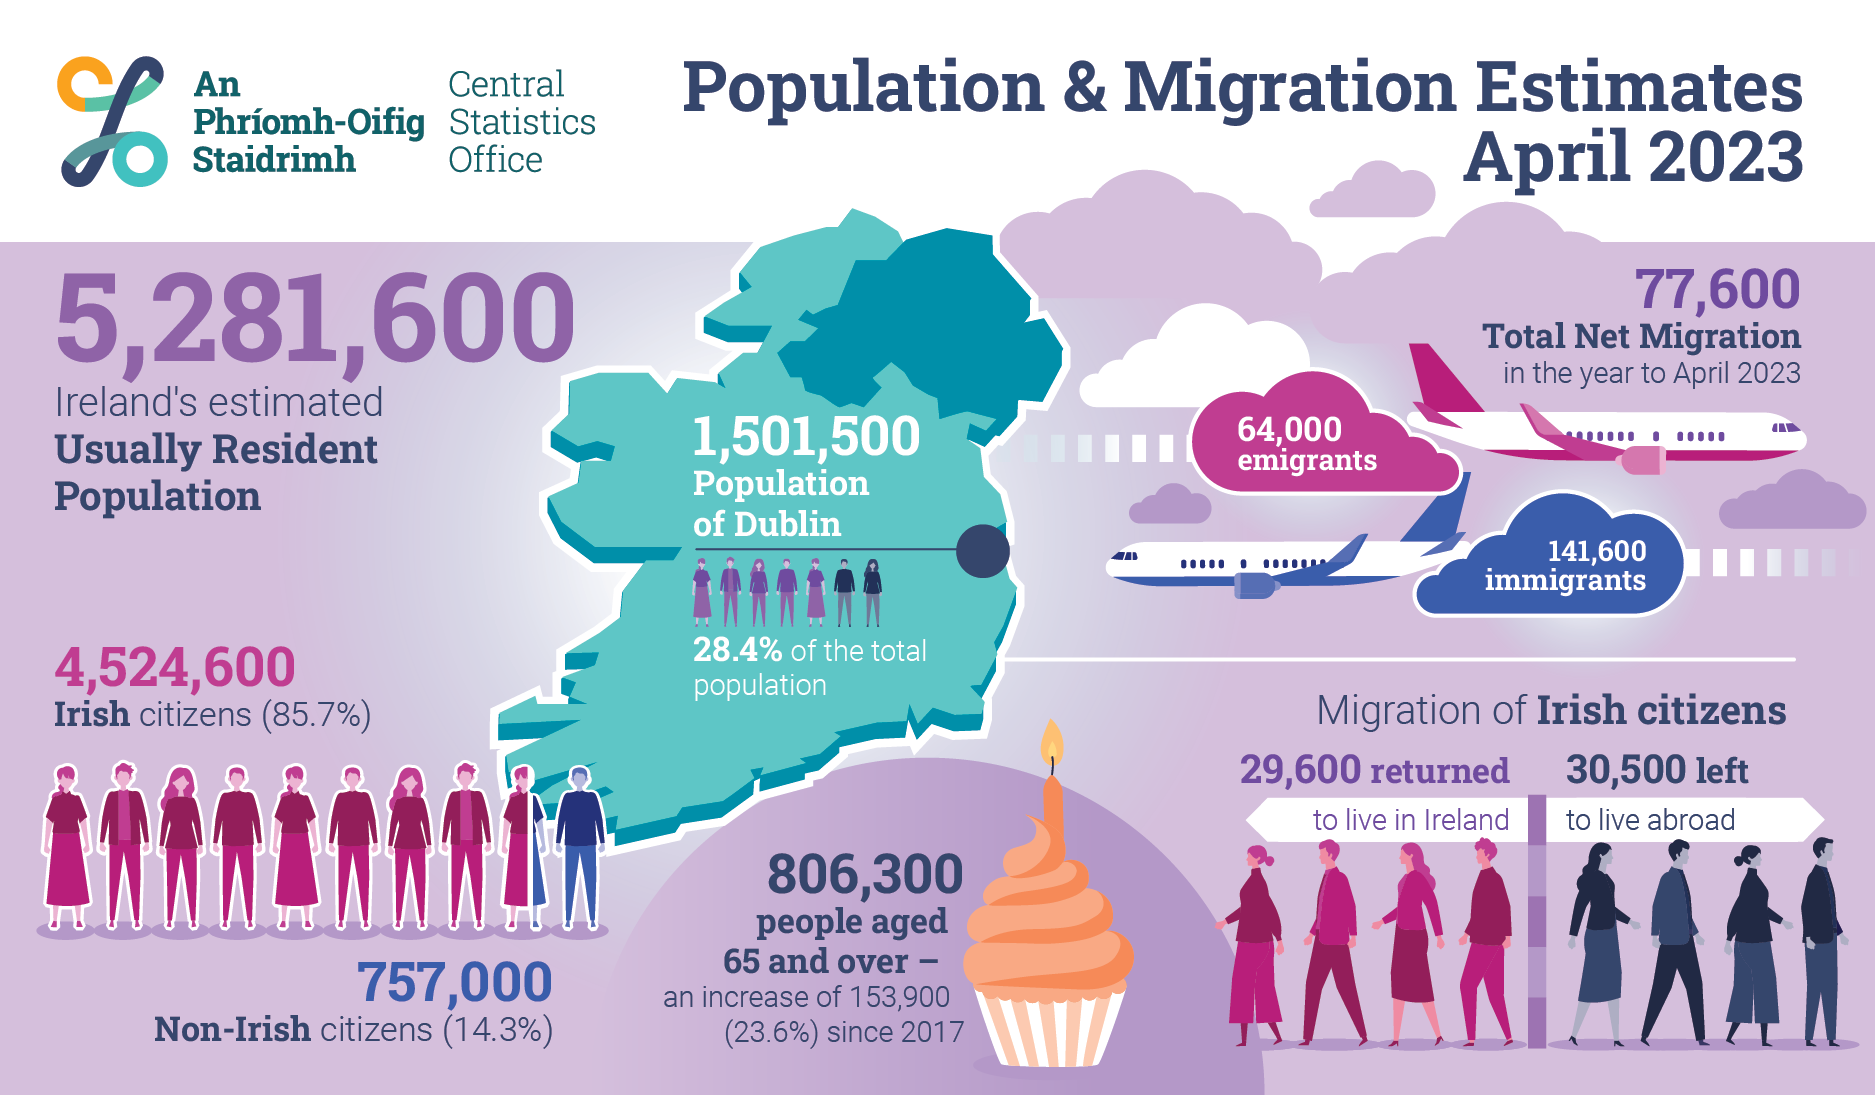

In [5]:
from IPython.display import Image
Image(filename =r"Pop_imig_2023.png", width = 900, height = 400)

In [6]:
# Import data
df = pd.read_csv("PEA15.csv")

# df = sns.load_dataset("PEA15.csv").rename(columns={"Component": "Indicator"})
#df

# Making sure that my data set is ready to - EDA
    - df.head( )
    - df.info( )
    - df.describe( )
    - df.shape
    - df.dtypes

In [88]:
df.head(10)

,Year,Component,VALUE,real_number
0,2014,Annual births,68.4,68400.0
1,2014,Annual deaths,29.2,29200.0
2,2014,Natural increase,39.2,39200.0
3,2014,Immigrants,66.5,66500.0
4,2014,Emigrants,75.0,75000.0
5,2014,Net migration,-8.5,-8500.0
6,2014,Population change,30.8,30800.0
7,2014,Population,4645.4,4645400.0
8,2015,Annual births,66.4,66400.0
9,2015,Annual deaths,29.9,29900.0


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         80 non-null     int64  
 1   Component    80 non-null     object 
 2   VALUE        80 non-null     float64
 3   real_number  80 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 2.6+ KB


In [9]:
df.describe()

,Year,VALUE
count,80.000000,80.000000
mean,2018.500000,662.897500
std,2.890403,1624.673646
min,2014.000000,-8.500000
25%,2016.000000,34.125000
50%,2018.500000,56.700000
75%,2021.000000,76.325000
max,2023.000000,5281.600000


In [10]:
df.shape

(80, 5)

In [11]:
df.dtypes

STATISTIC Label     object
Year                 int64
Component           object
UNIT                object
VALUE              float64
dtype: object

In [12]:
df.count()

STATISTIC Label    80
Year               80
Component          80
UNIT               80
VALUE              80
dtype: int64

In [13]:
#Verifing if I have any data duplicated (inconsitent)
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 5)


In [14]:
#Cleaning my dataset - I won"t need these 2 columns
to_drop = ["STATISTIC Label",
            "UNIT"]
df.drop(to_drop, inplace=True, axis=1)

In [15]:
#Converting the numbers to be better in the visualisation
df ["real_number"] = df ["VALUE"]* 1000

In [16]:
print(df.columns)

Index(['Year', 'Component', 'VALUE', 'real_number'], dtype='object')


In [17]:
# Create a a function where to help when I'm plotting.
def label_graph(ticksfont , x_label , y_label , title_label , fontsize):
    
    plt.xticks(fontsize = ticksfont)
    plt.yticks(fontsize = ticksfont)

    plt.xlabel(x_label, fontsize = fontsize)
    plt.ylabel(y_label , fontsize = fontsize)
    plt.title(title_label, fontsize = fontsize)

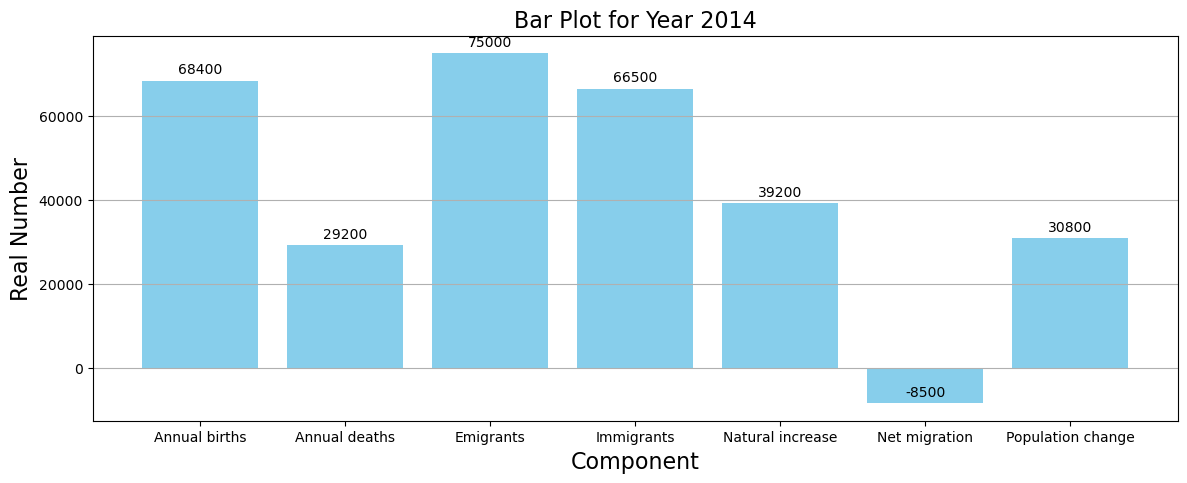

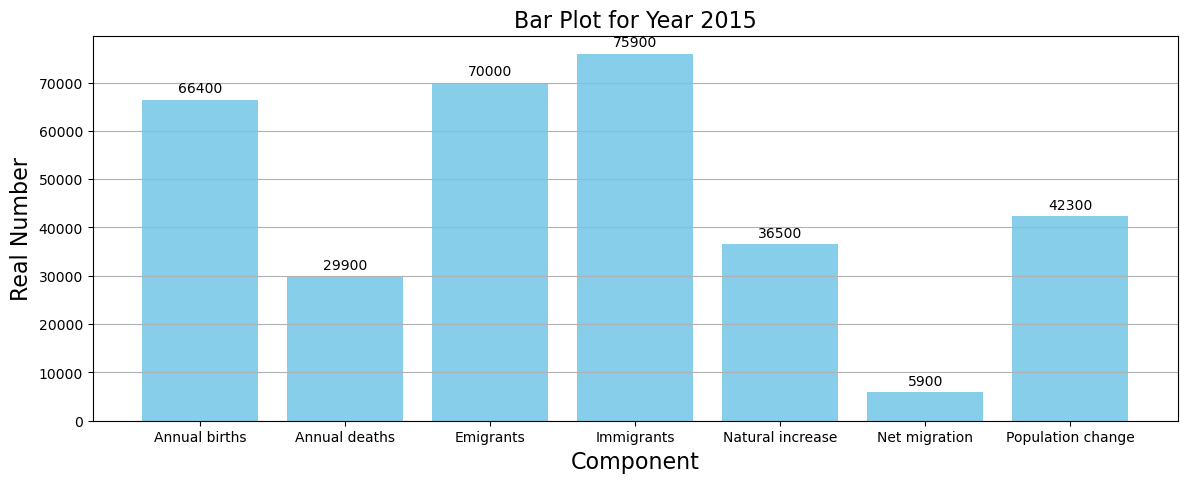

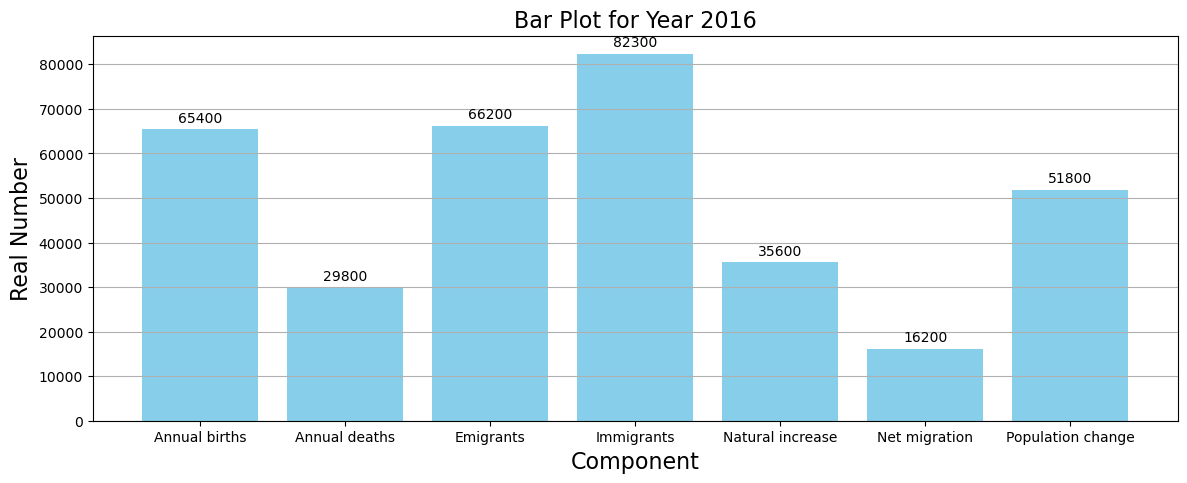

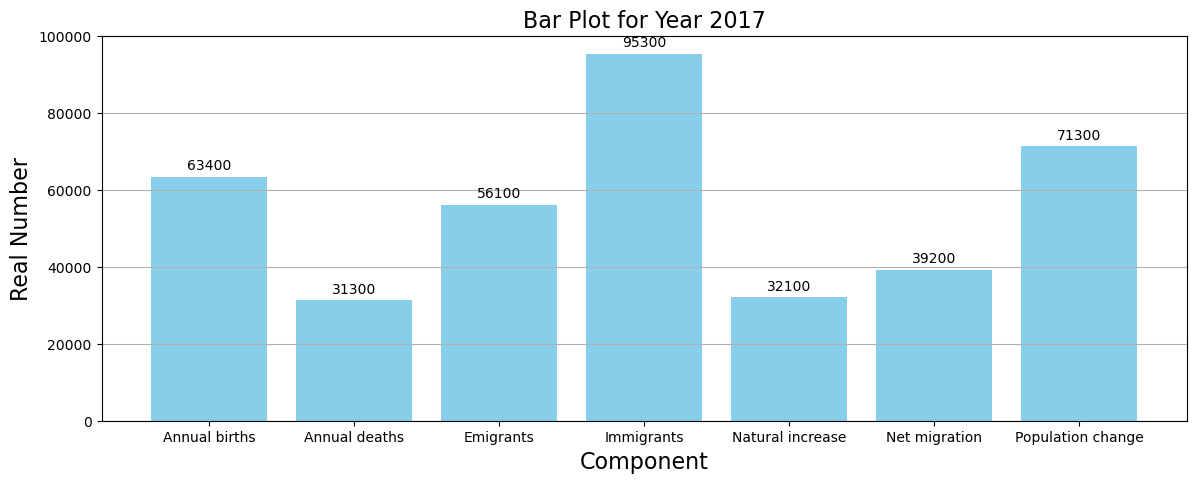

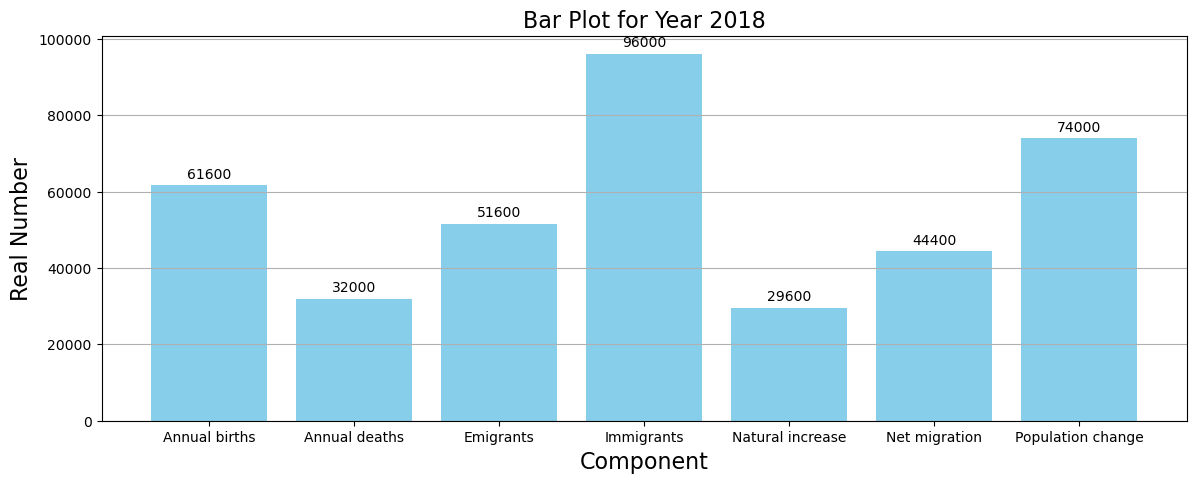

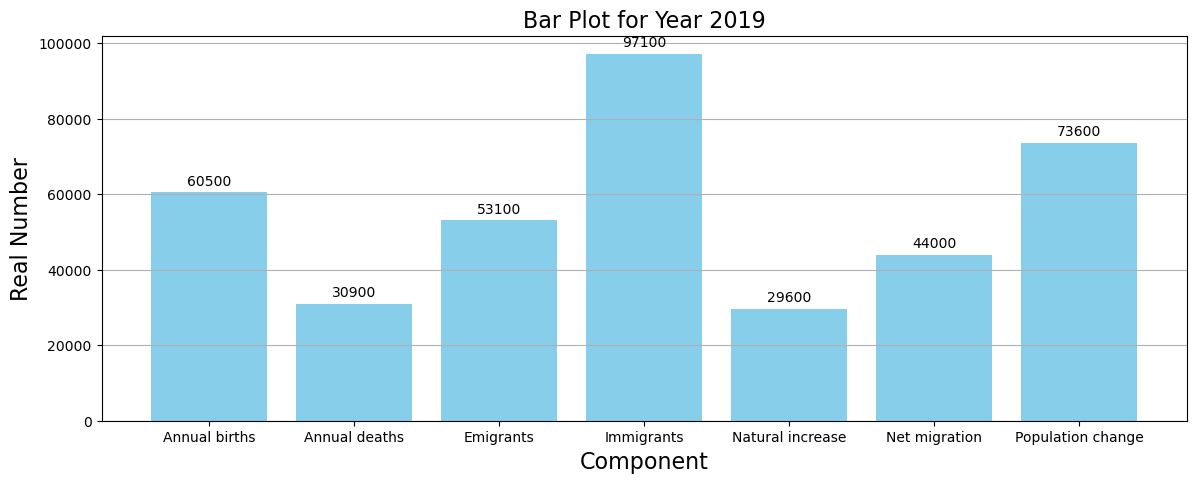

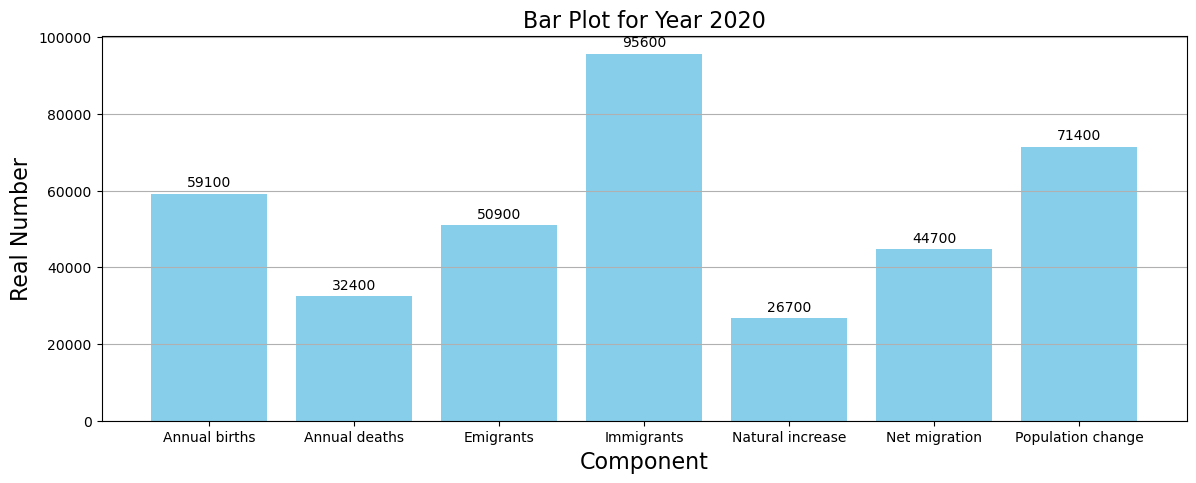

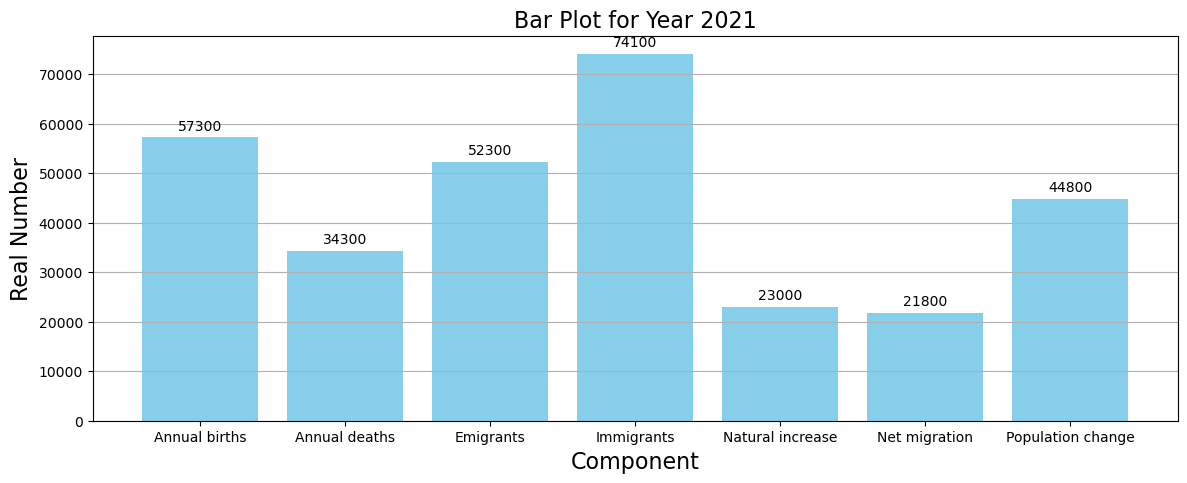

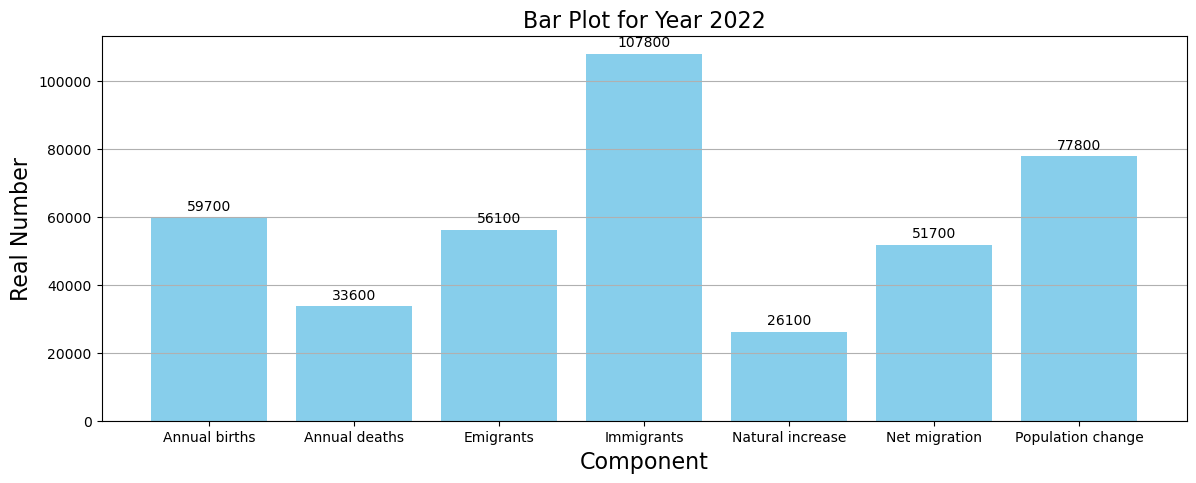

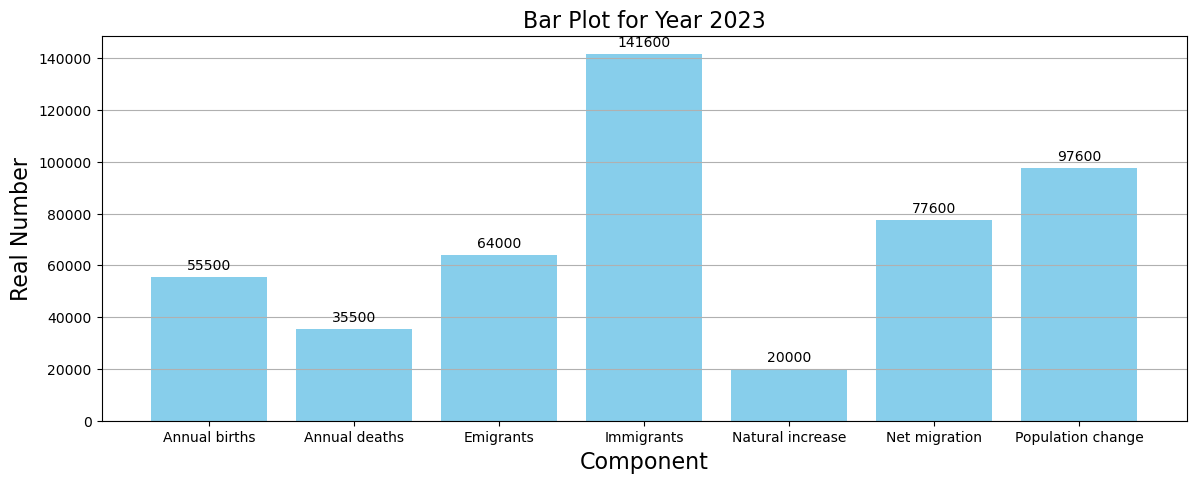

In [18]:
# Getting unique years in the DataFrame
years = df["Year"].unique()

# Create a separate bar plot for each year
for year in years:
    year_data = df[df["Year"] == year]

# Filter out the "population" row for the current year
    year_data = year_data[year_data["Component"] != "Population"]

# Group the data by "Component" and calculate the sum of "VALUE"
    grouped = year_data.groupby("Component")["real_number"].sum()

# Create a bar plot for the current year
    plt.figure(figsize=(14, 5))
    bars = plt.bar(grouped.index, grouped.values, color="skyblue")
    plt.grid(axis = "y")
    label_graph(10 ,"Component" , "Real Number" , f"Bar Plot for Year {year}" , 16 )
# Annotate each bar with its value
    for bar in bars:
        height = int (bar.get_height()) # Convert height to an integer better vizualisation
        plt.annotate(f"{height}", xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3), 
                     textcoords="offset points", ha="center", va="bottom")

# Show each plot
    plt.show()

In [93]:
# Filter rows where "Component" contains "Net migration"
subdata_netMig = df[df["Component"].str.contains("Net migration")]

# Select "Year" and "real_number" columns
subdata_netMig = subdata_netMig[["Year", "real_number"]]

In [94]:
print(subdata_netMig)

    Year  real_number
5   2014      -8500.0
13  2015       5900.0
21  2016      16200.0
29  2017      39200.0
37  2018      44400.0
45  2019      44000.0
53  2020      44700.0
61  2021      21800.0
69  2022      51700.0
77  2023      77600.0


In [21]:
subdata_netMig.describe()

,Year,real_number
count,10.00000,10.000000
mean,2018.50000,33700.000000
std,3.02765,24999.066649
min,2014.00000,-8500.000000
25%,2016.25000,17600.000000
50%,2018.50000,41600.000000
75%,2020.75000,44625.000000
max,2023.00000,77600.000000


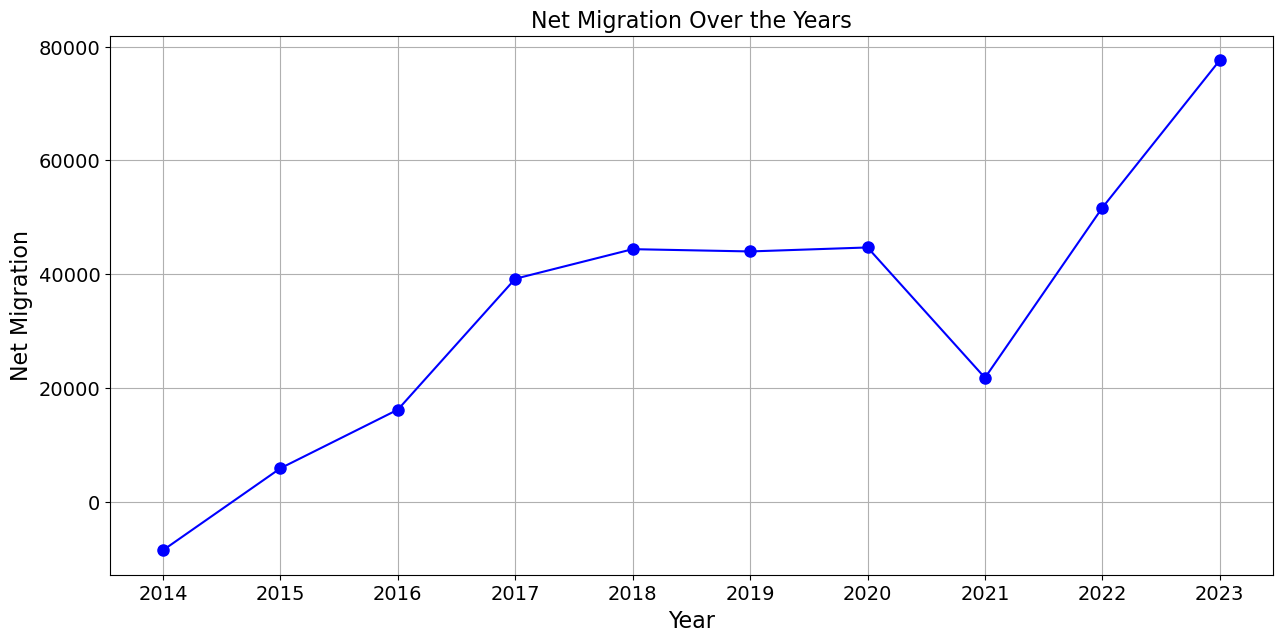

In [22]:
# Creating a line plot for "Net migration" over the years
plt.figure(figsize=(15, 7))
plt.plot(subdata_netMig["Year"], subdata_netMig["real_number"], marker="o", linestyle="-", 
         c="b", ms = 8) # "ms" abreviation to markersize "c" to color
plt.grid(True)
#plt.plot(2023, 77600 , marker = "o" , color = "r" , markersize = 15)

plt.xticks(subdata_netMig["Year"])
label_graph(14 ,"Year" , "Net Migration" , "Net Migration Over the Years" , 16 )

# "-", "--", "-.", ":", "None", " ", "", "solid", "dashed", "dashdot", "dotted"

In [23]:
# Filter rows where "Component" contains "Population change" and creating a new df
subdata_pop_chang = df[df["Component"].str.contains("Population change")]

# Select "Year" and "real_number" columns
subdata_pop_chang2 = subdata_pop_chang[[ "real_number"]]

In [24]:
subdata_pop_chang

,Year,Component,VALUE,real_number
6,2014,Population change,30.8,30800.0
14,2015,Population change,42.3,42300.0
22,2016,Population change,51.8,51800.0
30,2017,Population change,71.3,71300.0
38,2018,Population change,74.0,74000.0
46,2019,Population change,73.6,73600.0
54,2020,Population change,71.4,71400.0
62,2021,Population change,44.8,44800.0
70,2022,Population change,77.8,77800.0
78,2023,Population change,97.6,97600.0


In [25]:
subdata_pop_chang2.describe()

,real_number
count,10.000000
mean,63540.000000
std,20298.067779
min,30800.000000
25%,46550.000000
50%,71350.000000
75%,73900.000000
max,97600.000000


## Using Normal distribution to explain or identify some information about your dataset
 

In [26]:
# Sample statistics for "subdata_pop_chang2"
mean = 63540.0  # Mean of the "real_number" column
std_dev = 20298.067779  # Standard deviation of the "real_number" column
num_samples = 10  # Number of data points, matching the count in your statistics

# Generate random data following a normal distribution
normal_data = np.random.normal(mean, std_dev, num_samples)

# Create a DataFrame with the generated data
df_normal = pd.DataFrame({"real_number": normal_data})

# Display the generated DataFrame
print(df_normal)

     real_number
0   25724.685524
1  106128.156207
2   58675.370866
3   49258.545215
4   77653.740130
5   54254.139635
6   46242.616463
7   52235.839861
8   53794.662843
9   66240.860905


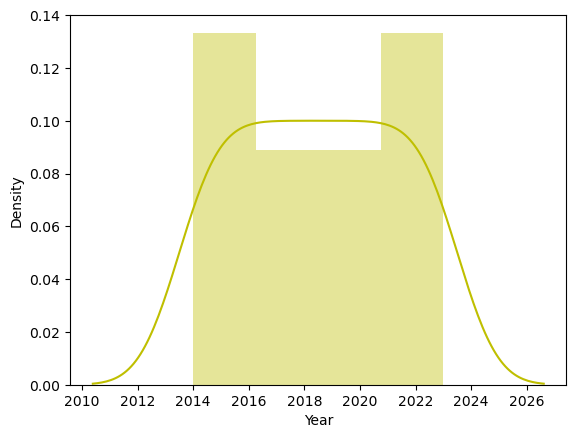

In [27]:
ax = sns.distplot(df.Year, color = "y")

In [61]:
# Transposing the 'Component' column
transposed_df = df.pivot(index='Year', columns='Component', values='real_number')
print(transposed_df)

Component  Annual births  Annual deaths  Emigrants  Immigrants  \
Year                                                             
2014             68400.0        29200.0    75000.0     66500.0   
2015             66400.0        29900.0    70000.0     75900.0   
2016             65400.0        29800.0    66200.0     82300.0   
2017             63400.0        31300.0    56100.0     95300.0   
2018             61600.0        32000.0    51600.0     96000.0   
2019             60500.0        30900.0    53100.0     97100.0   
2020             59100.0        32400.0    50900.0     95600.0   
2021             57300.0        34300.0    52300.0     74100.0   
2022             59700.0        33600.0    56100.0    107800.0   
2023             55500.0        35500.0    64000.0    141600.0   

Component  Natural increase  Net migration  Population  Population change  
Year                                                                       
2014                39200.0        -8500.0   4645400.0 

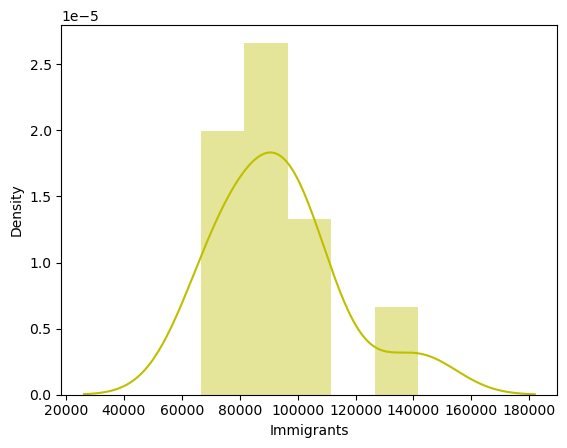

In [29]:
ax = sns.distplot(transposed_df.Immigrants, color = "y")

In [62]:
transposed_df.head(10)

Component,Annual births,Annual deaths,Emigrants,Immigrants,Natural increase,Net migration,Population,Population change
Year,,,,,,,,
2014,68400.0,29200.0,75000.0,66500.0,39200.0,-8500.0,4645400.0,30800.0
2015,66400.0,29900.0,70000.0,75900.0,36500.0,5900.0,4687800.0,42300.0
2016,65400.0,29800.0,66200.0,82300.0,35600.0,16200.0,4739600.0,51800.0
2017,63400.0,31300.0,56100.0,95300.0,32100.0,39200.0,4810900.0,71300.0
2018,61600.0,32000.0,51600.0,96000.0,29600.0,44400.0,4884900.0,74000.0
2019,60500.0,30900.0,53100.0,97100.0,29600.0,44000.0,4958500.0,73600.0
2020,59100.0,32400.0,50900.0,95600.0,26700.0,44700.0,5029900.0,71400.0
2021,57300.0,34300.0,52300.0,74100.0,23000.0,21800.0,5074700.0,44800.0
2022,59700.0,33600.0,56100.0,107800.0,26100.0,51700.0,5184000.0,77800.0


In [31]:
transposed_df.describe()

Component,Annual births,Annual deaths,Emigrants,Immigrants,Natural increase,Net migration,Population,Population change
count,10.000000,10.000000,10.00000,10.000000,10.00000,10.000000,1.000000e+01,10.000000
mean,61730.000000,31890.000000,59530.00000,93220.000000,29840.00000,33700.000000,4.929730e+06,63540.000000
std,4130.657736,2079.770286,8614.72254,21303.979806,6126.66304,24999.066649,2.139567e+05,20298.067779
min,55500.000000,29200.000000,50900.00000,66500.000000,20000.00000,-8500.000000,4.645400e+06,30800.000000
25%,59250.000000,30150.000000,52500.00000,77500.000000,26250.00000,17600.000000,4.757425e+06,46550.000000
50%,61050.000000,31650.000000,56100.00000,95450.000000,29600.00000,41600.000000,4.921700e+06,71350.000000
75%,64900.000000,33300.000000,65650.00000,96825.000000,34725.00000,44625.000000,5.063500e+06,73900.000000
max,68400.000000,35500.000000,75000.00000,141600.000000,39200.00000,77600.000000,5.281600e+06,97600.000000


In [32]:
# Import the library for standartization of the data
from sklearn.preprocessing import StandardScaler

In [33]:
obj_std = StandardScaler().fit(transposed_df) # Train the model by calling a method, fit() just creating a object

In [34]:
df_std = obj_std.transform(transposed_df) # this moment I'm applying the preprocessor

In [35]:
df_std

array([[ 1.70210116, -1.36337604,  1.89290041, -1.32207002,  1.61038827,
        -1.77937466, -1.40079819, -1.70021061],
       [ 1.191726  , -1.00859417,  1.28110325, -0.85697054,  1.14585319,
        -1.17219468, -1.19190767, -1.10300774],
       [ 0.93653842, -1.05927729,  0.81613741, -0.54030706,  0.99100817,
        -0.73789234, -0.93670651, -0.60966624],
       [ 0.42616326, -0.29903043, -0.41969285,  0.10291563,  0.38883307,
         0.23190902, -0.58543541,  0.40298211],
       [-0.03317439,  0.05575144, -0.97031029,  0.1375507 , -0.04129201,
         0.45116846, -0.22086232,  0.54319496],
       [-0.31388072, -0.50176293, -0.78677115,  0.19197723, -0.04129201,
         0.43430235,  0.14174011,  0.52242269],
       [-0.67114334,  0.25848393, -1.05596189,  0.11775923, -0.54023709,
         0.46381804,  0.49350387,  0.40817518],
       [-1.13048098,  1.22146329, -0.88465869, -0.94603214, -1.1768222 ,
        -0.50176679,  0.71421839, -0.97318103],
       [-0.51803079,  0.86668142

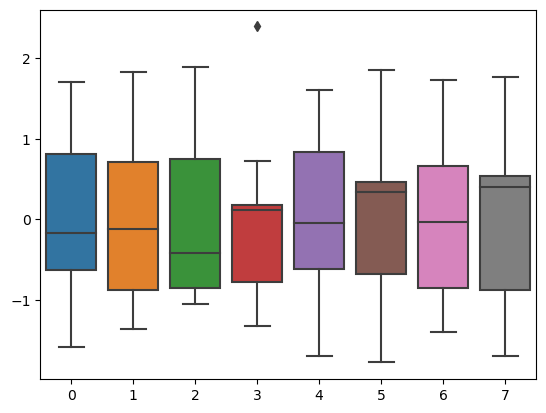

In [36]:
ax = sns.boxplot(data = df_std)
# printing this box plot to show that the all the means are close to 
# each other and close to "0" in other words, standardized.

In [37]:
df_std = pd.DataFrame(df_std) # converting into a data frame to be easier to be called

In [38]:
df_std.describe()

,0,1,2,3,4,5,6,7
count,1.000000e+01,10.000000,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01
mean,1.776357e-16,0.000000,-5.551115e-17,-4.440892e-17,2.220446e-17,2.220446e-17,2.220446e-17,2.220446e-17
std,1.054093e+00,1.054093,1.054093e+00,1.054093e+00,1.054093e+00,1.054093e+00,1.054093e+00,1.054093e+00
min,-1.589819e+00,-1.363376,-1.055962e+00,-1.322070e+00,-1.692972e+00,-1.779375e+00,-1.400798e+00,-1.700211e+00
25%,-6.328652e-01,-0.881886,-8.601868e-01,-7.778047e-01,-6.176596e-01,-6.788609e-01,-8.488887e-01,-8.823023e-01
50%,-1.735276e-01,-0.121639,-4.196929e-01,1.103374e-01,-4.129201e-02,3.331057e-01,-3.956111e-02,4.055786e-01
75%,8.089446e-01,0.714632,7.488397e-01,1.783706e-01,8.404644e-01,4.606556e-01,6.590398e-01,5.380019e-01
max,1.702101e+00,1.829661,1.892900e+00,2.393778e+00,1.610388e+00,1.851056e+00,1.733545e+00,1.768759e+00


In [39]:
# Import the library for normalisation of the data
from sklearn.preprocessing import MinMaxScaler

In [40]:
obj_norm = MinMaxScaler().fit(transposed_df) # just creating a object to normalisation

In [41]:
df_norm = obj_norm.transform(transposed_df) # this moment I'm applying the preprocessor

In [42]:
df_norm = pd.DataFrame(df_norm) # converting into a data frame to be easier to be called

In [43]:
df_norm.head()

,0,1,2,3,4,5,6,7
0,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
1,0.844961,0.111111,0.792531,0.125166,0.859375,0.167247,0.066646,0.172156
2,0.767442,0.095238,0.634855,0.210386,0.812500,0.286876,0.148067,0.314371
3,0.612403,0.333333,0.215768,0.383489,0.630208,0.554007,0.260138,0.606287
4,0.472868,0.444444,0.029046,0.392810,0.500000,0.614402,0.376454,0.646707


In [44]:
df_norm.describe() # we can see that my data it's normalized from 0.3 - 1.0

,0,1,2,3,4,5,6,7
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.482946,0.426984,0.358091,0.355792,0.512500,0.490128,0.446919,0.490120
std,0.320206,0.330122,0.357457,0.283675,0.319097,0.290349,0.336304,0.303863
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.290698,0.150794,0.066390,0.146471,0.325521,0.303136,0.176085,0.235778
50%,0.430233,0.388889,0.215768,0.385486,0.500000,0.581882,0.434297,0.607036
75%,0.728682,0.650794,0.612033,0.403795,0.766927,0.617015,0.657183,0.645210
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


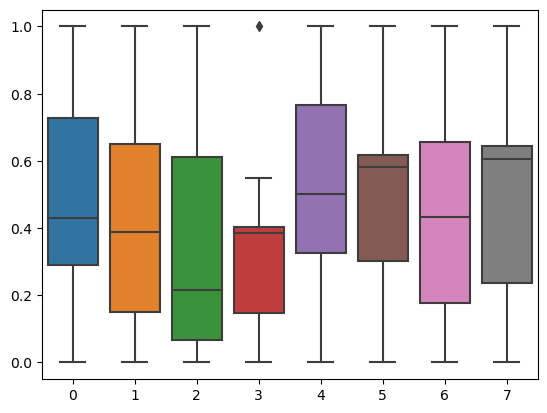

In [45]:
ax = sns.boxplot(data = df_norm)
# printing this box plot to show that the all the data is normalized but the mean is not that close to each other

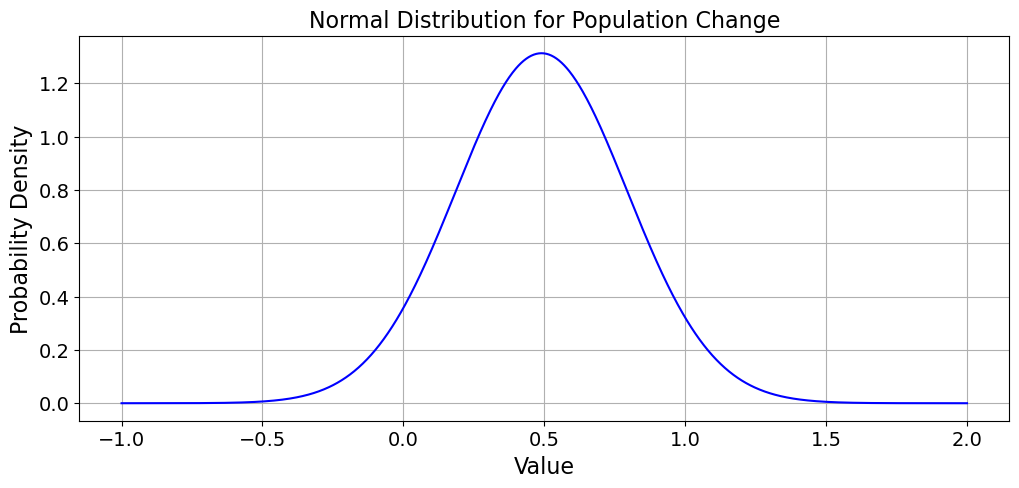

In [46]:
from scipy.stats import norm

# Mean and standard deviation for variable 7
mean = 0.490120
std_dev = 0.303863

# Generate values for the x-axis
x = np.linspace(-1, 2, 1000)  # Adjust the range as needed

# Calculate the PDF for the normal distribution
pdf = norm.pdf(x, loc=mean, scale=std_dev)

# Create a plot of the normal distribution
plt.figure(figsize=(12, 5))
plt.plot(x, pdf, color= "b", label="Normal Distribution")
label_graph(14 ,"Value" , "Probability Density" , "Normal Distribution for Population Change" , 16 )
plt.grid(True)

# Show the plot
plt.show()

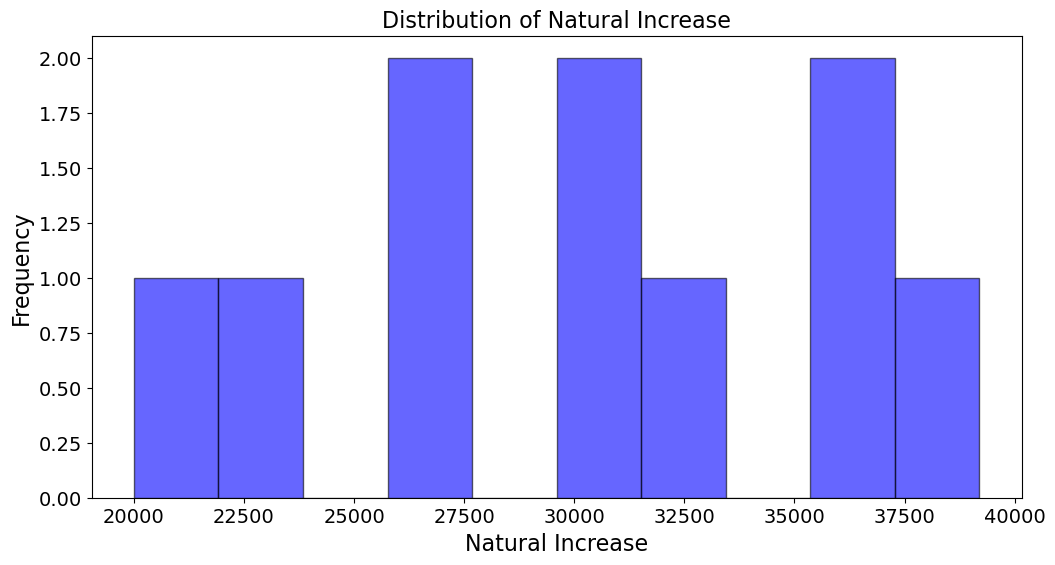

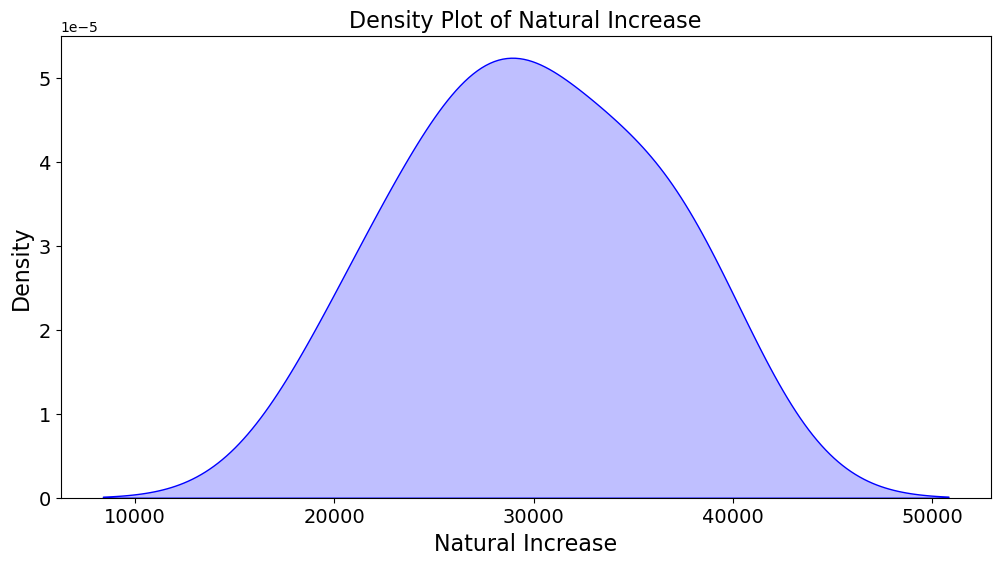

In [47]:


# Assuming "natural_increase" is a list or array containing your data
#natural_increase = [20000, 29600, 26250, 29840, 39200, 34725, 44625, 26250, 29600, 34725]

natural_increase = transposed_df ["Natural increase"]

# Create a histogram
plt.figure(figsize=(12, 6))
plt.hist(natural_increase, bins=10, edgecolor="k", alpha=0.6, color="blue")
label_graph(14 ,"Natural Increase" , "Frequency" , "Distribution of Natural Increase" , 16 )

#plt.show()

# Create a density plot (smoothed distribution)
plt.figure(figsize=(12, 6))
sns.kdeplot(natural_increase, shade=True, color="blue")
label_graph(14 ,"Natural Increase" , "Density" , "Density Plot of Natural Increase" , 16 )

#plt.show()

# Predict with Liner regration

In [100]:
# Filter rows where "Component" contains "Net migration"
subdata_Immi = df[df["Component"].str.contains("Immigrants")]

# Select "Year" and "real_number" columns
subdata_Immi = subdata_Immi[["Year", "real_number"]]

In [107]:
 subdata_Immi

,Year,real_number
3,2014,66500.0
11,2015,75900.0
19,2016,82300.0
27,2017,95300.0
35,2018,96000.0
43,2019,97100.0
51,2020,95600.0
59,2021,74100.0
67,2022,107800.0
75,2023,141600.0


# # Implementing at a simple regression model - Ordinary least squares

In [106]:
# Create a class named as 'LinearRegressionGD'
class LinearRegressionGD(object):
    
    def __init__(self, eta = 0.001, n_iter = 20):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return self.net_input(X)

In [103]:
X = subdata_Immi[["Year"]].values
y = subdata_Immi[["real_number"]].values

In [105]:
X.shape, y.shape

((10, 1), (10, 1))

In [104]:
# import LinearRegression from sklearn library
from sklearn.linear_model import LinearRegression

# Initialise an object named as 'slr' by calling a method LinearRegression()
slr = LinearRegression()

# Train the model
slr.fit(X, y)

# Predict the results
y_pred = slr.predict(X)

# Display the Slope and Intercept values
print('Slope: %.3f' % slr.coef_[0])
print('Intercept: %.3f' % slr.intercept_)

Slope: 5213.333
Intercept: -10429893.333


In [108]:
# Import the library for normalization of the data
from sklearn.preprocessing import StandardScaler

# Initialise the objects using StandardScaler() 
sc_x = StandardScaler()
sc_y = StandardScaler()

# Train the objects using fit_transform()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y)

In [109]:
# Reshape the (10, 1) to (10,) array for Machine Learning model
y_std = np.reshape(y_std, 10)

# Display the number of rows and columns
X_std.shape, y_std.shape

((10, 1), (10,))

In [110]:
# Initialise an object (lr) using the created function LinearRegressionGD()
lr = LinearRegressionGD()

# Train the model by calling fit() mentiof
lr.fit(X_std, y_std)

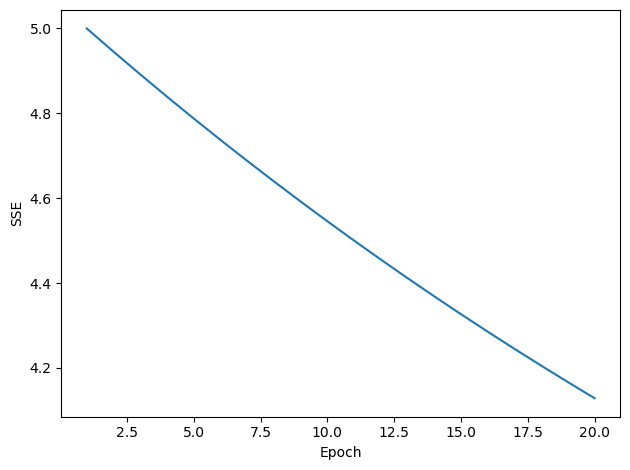

In [111]:
# Draw a plot using linear regression iterations and cost
plt.plot(range(1, lr.n_iter + 1), lr.cost_)
plt.ylabel('SSE')           # SSE means 'sum of squares error'
plt.xlabel('Epoch')         # The number of epochs is a hyperparameter that defines the number times 
                            # that the learning algorithm will work through the entire training 
                            # dataset. One epoch means that each sample in the training dataset has 
                            # had an opportunity to update the internal model parameters. 
                            # An epoch is comprised of one or more batches.
plt.tight_layout()
plt.savefig('cost.png', dpi = 300)
plt.show()

In [112]:
# Method or Function for Linear Regression plot
def lin_regplot(X, y, model):
    plt.scatter(X, y, c = 'blue')
    plt.plot(X, model.predict(X), color = 'red', linewidth = 2)    
    return

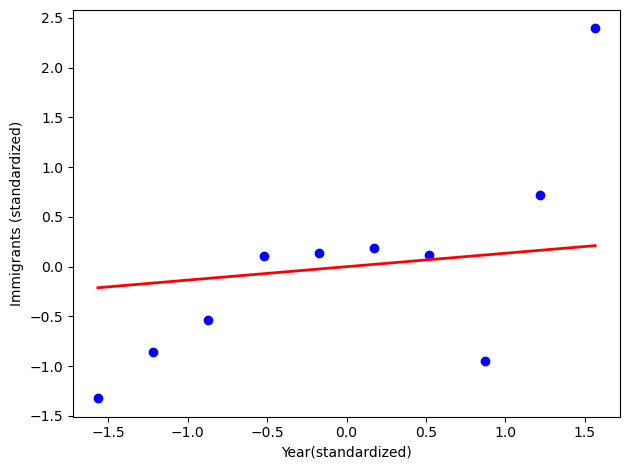

In [113]:
# Call the method lin_regplot()
lin_regplot(X_std, y_std, lr)
plt.xlabel('Year(standardized)')
plt.ylabel('Immigrants (standardized)')
plt.tight_layout()
# plt.savefig('./figures/gradient_fit.png', dpi=300)
plt.show()

# Estimating coefficient of a regression model via scikit-learn

In [119]:
# import LinearRegression from sklearn library
from sklearn.linear_model import LinearRegression

# Initialise an object named as 'slr' by calling a method LinearRegression()
slr = LinearRegression()

# Train the model
slr.fit(X, y)

# Predict the results
y_pred = slr.predict(X)

# Display the Slope and Intercept values
print('Slope: %.3f' % slr.coef_[0])
print('Intercept: %.3f' % slr.intercept_)

Slope: 5213.333
Intercept: -10429893.333


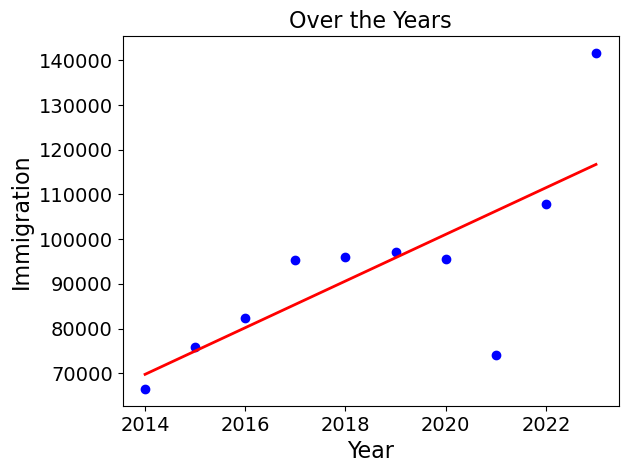

In [122]:
# Display the regression plot using lin_regplot() method
lin_regplot(X, y, slr)
label_graph(14 ,"Year" , "Immigration" , "Over the Years" , 16 )

# Evaluating the performance of linear regression models

In [124]:
# import train_test_split from the library sklearn
from sklearn.model_selection import train_test_split

# Declare a variable named as 'X' and 'y'
X = subdata_Immi[["Year"]].values         
y = subdata_Immi[["real_number"]].values                  # Target variable

# Split the data into 80% and 20% by using a parameter test_size = 30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Display the size of the rows and columns
X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape

((10, 1), (10, 1), (8, 1), (2, 1), (8, 1), (2, 1))

In [130]:
# Initialise an object slr by calling a method named as 'LinearRegression()'
slr = LinearRegression()

# Trian the model
slr.fit(X_train, y_train)

# Predict the results for the training and testing
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

In [133]:
# Calculate the r2_score and mean squared error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# Display the means squared error and r2 score values
print('MSE train: %.1f, test: %.1f' % (mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)))

MSE train: 227377500.0, test: 15385000.0
R^2 train: 0.515, test: 0.905
